In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 
from mpl_toolkits.mplot3d import Axes3D

from scipy.spatial import Delaunay
from matplotlib import gridspec

import model
import numpy as np

import stats

from scipy.interpolate import griddata


from matplotlib.colors import LogNorm

plt.rcParams['font.size'] = 8
plt.rcParams['font.weight'] = 'bold'  # NEW
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'  

In [51]:
def get_data(df, idx):
    points = []
    for (b, a), data in df.items():
        
        points.append([b, a, [data[idx][i, 100, 1] for i in range(data[idx].shape[0])]])
    return points

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

def plot_raster_imshow_from_points(points, title, vmin=None, vmax=None):
    plt.figure(figsize=(3.5, 2.5))
    x, y, z = points[:, 0], points[:, 1], points[:, 2]
    y = x - y
    x_vals = np.unique(np.round(x.astype(float), 2))
    y_vals = np.unique(np.round(y.astype(float), 2))
    z = z.reshape(x_vals.size, y_vals.size)    

    if vmin is None:
        vmin = z.min()
    if vmax is None:
        vmax = z.max()
        
    #plt.figure(figsize=(7, 6))
    img = plt.imshow(z, extent=(y_vals.min(), y_vals.max(), x_vals.min(), x_vals.max()), aspect='auto', 
                    vmin=vmin, vmax=vmax, cmap='magma')
    plt.colorbar(img)
    plt.yticks([0.1, 0.125, 0.15, 0.175, 0.2])
    plt.xticks([-0.1, -0.05, 0, 0.05, 0.1])
    plt.xlabel(r'$ \gamma $')
    plt.ylabel(r'$ \beta $')
    plt.title(title)
    plt.tight_layout()


In [53]:
df = pickle.load(open('/home/francesco/NeuronGrowth/sim_data.pkl', 'rb'))

In [54]:
df[(0.1, 0)][0][0, -1, :]

array([  50., 1913.])

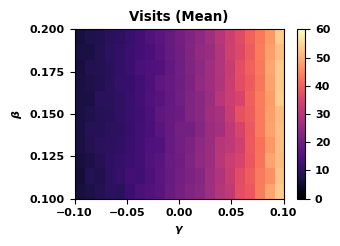

In [65]:
points = get_data(df, 0)
for p in points:
    p[-1] = np.mean(p[-1])
plot_raster_imshow_from_points(np.array(points), 'Visits (Mean)', vmin=0, vmax=60)
plt.savefig('meanZ.png', dpi=300)
plt.show()

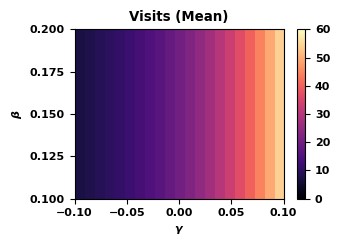

In [64]:
points = get_data(df, 0)
for p in points:
    p[-1] = model.mean_Z(10, 20, p[0], p[1])
plot_raster_imshow_from_points(np.array(points), 'Visits (Mean)', vmin=0, vmax=60)
plt.savefig('meanZTh.png', dpi=300)
plt.show()

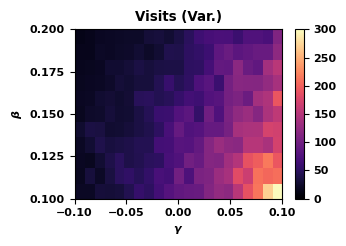

In [68]:
points = get_data(df, 0)
for p in points:
    p[-1] = np.var(p[-1])
plot_raster_imshow_from_points(np.array(points), 'Visits (Var.)', vmin=0, vmax=300)
plt.savefig('varZ.png', dpi=300)
plt.show()

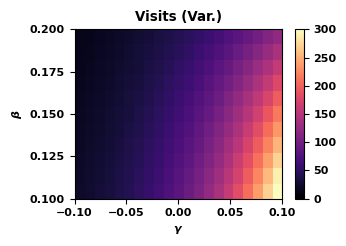

In [66]:
points = get_data(df, 0)
for p in points:
    p[-1] = model.var_Z(10, 20, 4, p[0], p[1])
plot_raster_imshow_from_points(np.array(points), 'Visits (Var.)', vmin=0, vmax=300)
plt.savefig('varZTh.png', dpi=300)
plt.show()

In [77]:
points = get_data(df, 0)
alpha = 0.01  / len(points)
cnt = 0
for p in points:           
    res = stats.one_sample_tests(np.mean(p[-1]), np.var(p[-1]), 100, 
                           mean_h0=model.mean_Z(10, 20, p[0], p[1] ), 
                           var_h0=model.var_Z(10, 20, 4, p[0], p[1]))
    pmean = res['T Test']['p_value']
    pvar = res['Chi2 Test']['p_value']
    if pmean < alpha:
        print('mean', p[0], p[1], pmean)
        print(np.mean(p[-1]), 
              model.mean_Z(10, 20, p[0], p[1]), '\n')
        
    if pvar < alpha:
        print('var', p[0], p[1], pvar)
        print(np.var(p[-1]), 
              model.var_Z(10, 20, 4, p[0], p[1]), '\n')
        cnt += 1
cnt

0

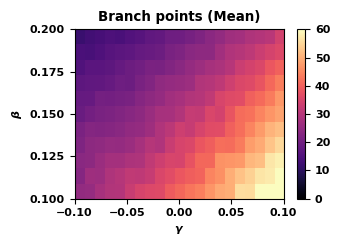

In [71]:
points = get_data(df, 1)
for p in points:
    p[-1] = np.mean(p[-1])
plot_raster_imshow_from_points(np.array(points), 'Branch points (Mean)', vmin=0, vmax=60)
plt.savefig('meanB.png', dpi=300)
plt.show()

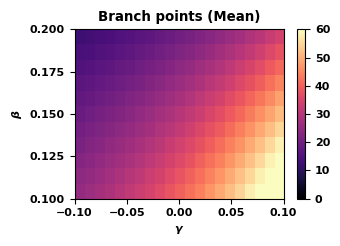

In [72]:
points = get_data(df, 1)
for p in points:
    p[-1] = model.mean_B(10, 20, p[0], p[1])
plot_raster_imshow_from_points(np.array(points), 'Branch points (Mean)', vmin=0, vmax=60)
plt.savefig('meanBTh.png', dpi=300)
plt.show()

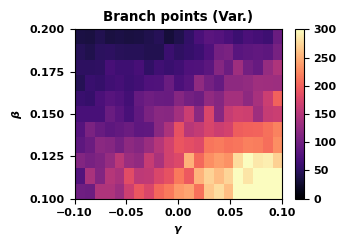

In [75]:
points = get_data(df, 1)
for p in points:
    p[-1] = np.var(p[-1])
plot_raster_imshow_from_points(np.array(points), 'Branch points (Var.)', vmin=0, vmax=300)
plt.savefig('varB.png', dpi=300)
plt.show()

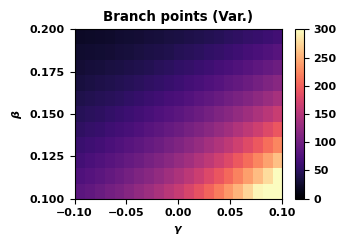

In [76]:
points = get_data(df, 1)
for p in points:
    p[-1] = model.var_B(10, 20, 4, p[0], p[1])
plot_raster_imshow_from_points(np.array(points), 'Branch points (Var.)', vmin=0, vmax=300)
plt.savefig('varBTh.png', dpi=300)
plt.show()

In [61]:
points = get_data(df, 1)
alpha = 0.01 / len(points)
cnt = 0
for p in points:    
    res = stats.one_sample_tests(np.mean(p[-1]), np.var(p[-1]), 100, 
                           mean_h0=model.mean_B(10, 20, p[0], p[1]), 
                           var_h0=model.var_B(10, 20, 4, p[0], p[1]))
    pmean = res['T Test']['p_value']
    pvar = res['Chi2 Test']['p_value']
    if pmean < alpha:
        print('mean', p[0], p[1])
        print(np.mean(p[-1]), 
              model.mean_B(10, 20, p[0], p[1]))
    if pvar < alpha:
        print('var', p[0], p[1])
        print(np.var(p[-1]), 
              model.var_B(10, 20, 4, p[0], p[1]))
        cnt+=1
        
print(cnt)

var 0.1 0.18
42.6016 24.322016706891578
var 0.1 0.08
71.24910000000001 41.72836864552166
var 0.1 0.07
82.68590000000002 44.13136350554987
var 0.1 0.06
79.13640000000001 46.679108402037315
var 0.11 0.21
46.16590000000001 25.82306989207764
var 0.11 0.19
49.44910000000001 28.66376626271997
var 0.11 0.18
51.2196 30.229576451710383
var 0.11 0.07
102.47840000000001 56.202823839384465
var 0.11 0.06
107.58240000000002 59.58495527787852
var 0.12 0.19
68.80560000000001 35.383687067198714
var 0.12 0.08
114.88640000000001 67.0906303955401
var 0.12 0.06
132.61959999999996 75.75666811121367
var 0.13 0.11
122.9675 70.15944718889352
var 0.15 0.22
94.05709999999999 54.47333314656438
var 0.15 0.14
165.0004 89.60508335844825
var 0.15 0.12
175.82590000000005 102.14182058353201
var 0.16 0.25
107.72560000000001 55.17543077999426
var 0.16 0.16
188.3259 96.85333333333334
var 0.17 0.25
119.10750000000002 66.42186442182505
var 0.17 0.17
191.46999999999997 111.06666666666668
var 0.18 0.28
112.75560000000002 66.3